# Analyze 311 dataset from NYC

## 1. step

Load dataset and check dimensions

In [1]:
# Read 311 data from local file system

import pandas as pd

df_311 = pd.read_csv('311.csv')

In [229]:
# get the dataset dimensions

num_rows, num_cols = df_311.shape
print ("The 311 dataset has %d rows and %d columns" % (num_rows,num_cols))

df_311.head()

The 311 dataset has 5730709 rows and 24 columns


,Unnamed: 0,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,...,Due Date,Resolution Action Updated Date,Community Board,BBL,Borough,Open Data Channel Type,Latitude,Longitude,Created Date date,Created Date month
0,0,05/22/2017 01:04:13 PM,06/01/2017 05:49:36 PM,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11207.0,473 PENNSYLVANIA AVENUE,PENNSYLVANIA AVENUE,ADDRESS,...,NaN,06/01/2017 05:49:36 PM,05 BROOKLYN,3.038060e+09,BROOKLYN,PHONE,40.665657,-73.894263,2017-05-22 01:04:13,2017-05-01
1,1,05/22/2017 05:30:54 PM,05/27/2017 11:22:47 AM,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,10010.0,231 EAST 24 STREET,EAST 24 STREET,ADDRESS,...,NaN,05/27/2017 11:22:47 AM,06 MANHATTAN,1.009050e+09,MANHATTAN,PHONE,40.739012,-73.981488,2017-05-22 05:30:54,2017-05-01
2,2,05/23/2017 05:01:02 PM,05/24/2017 11:42:10 AM,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,NaN,NaN,...,05/31/2017 11:42:03 AM,05/24/2017 11:42:03 AM,0 Unspecified,NaN,Unspecified,PHONE,NaN,NaN,2017-05-23 05:01:02,2017-05-01
3,3,02/15/2019 09:32:11 AM,02/24/2019 02:05:25 AM,APPLIANCE,ELECTRIC/GAS RANGE,RESIDENTIAL BUILDING,11212.0,280 GRAFTON STREET,GRAFTON STREET,ADDRESS,...,NaN,02/24/2019 02:05:25 AM,16 BROOKLYN,3.035800e+09,BROOKLYN,PHONE,40.661087,-73.917313,2019-02-15 09:32:11,2019-02-01
4,4,02/01/2019 10:46:34 AM,02/24/2019 02:05:24 AM,WATER LEAK,HEAVY FLOW,RESIDENTIAL BUILDING,11212.0,435 EAST 92 STREET,EAST 92 STREET,ADDRESS,...,NaN,02/24/2019 02:05:24 AM,17 BROOKLYN,3.046670e+09,BROOKLYN,PHONE,40.655616,-73.920541,2019-02-01 10:46:34,2019-02-01


In [230]:
# analyze dataset columns and types

print("311 dataset columns:\n", df_311.columns)
print("\n311 dataset data types:\n", df_311.dtypes)

311 dataset columns:
 Index(['Unnamed: 0', 'Created Date', 'Closed Date', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Landmark', 'Facility Type',
       'Status', 'Due Date', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'Open Data Channel Type',
       'Latitude', 'Longitude', 'Created Date date', 'Created Date month'],
      dtype='object')

311 dataset data types:
 Unnamed: 0                                 int64
Created Date                              object
Closed Date                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Address Type                              object
City        

## 2. step

Complaints should be analyzed, so let's see what kind of complaints we have

In [231]:
# see what complaint types we have

df_311['Complaint Type'].unique()

array(['APPLIANCE', 'HPD Literature Request', 'WATER LEAK',
       'FLOORING/STAIRS', 'HEAT/HOT WATER', 'PLUMBING', 'DOOR/WINDOW',
       'PAINT/PLASTER', 'GENERAL', 'UNSANITARY CONDITION', 'ELECTRIC',
       'SAFETY', 'ELEVATOR', 'OUTSIDE BUILDING', 'NONCONST', 'HEATING',
       'PAINT - PLASTER', 'GENERAL CONSTRUCTION', 'CONSTRUCTION',
       'STRUCTURAL', 'VACANT APARTMENT', 'AGENCY'], dtype=object)

The top 4 complaints are:

 Complaint Type
HEAT/HOT WATER          1129792
HEATING                  887869
PLUMBING                 689654
GENERAL CONSTRUCTION     500863
dtype: int64


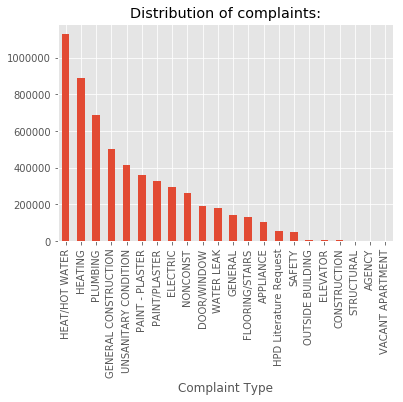

In [232]:
# see how the complaints are distributed

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline 

mpl.style.use('ggplot') # for ggplot-like style

df_311_complaints = df_311.groupby(['Complaint Type']).size().sort_values(ascending=False)

print ("The top 4 complaints are:\n\n", df_311_complaints.head(4))

df_311_complaints.plot('bar', title="Distribution of complaints:")

## 3. step 

It's said that the complaints are rising, so check against time (create date)

In [233]:
# convert string to date for grouping

df_311['Created Date date'] = pd.to_datetime(df_311['Created Date'], format='%m/%d/%Y %H:%M:%S %p')
df_311['Created Date month'] = df_311['Created Date date'].apply(lambda x: datetime(year=x.year, month=x.month, day=1))

df_311.head()

,Unnamed: 0,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,...,Due Date,Resolution Action Updated Date,Community Board,BBL,Borough,Open Data Channel Type,Latitude,Longitude,Created Date date,Created Date month
0,0,05/22/2017 01:04:13 PM,06/01/2017 05:49:36 PM,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,11207.0,473 PENNSYLVANIA AVENUE,PENNSYLVANIA AVENUE,ADDRESS,...,NaN,06/01/2017 05:49:36 PM,05 BROOKLYN,3.038060e+09,BROOKLYN,PHONE,40.665657,-73.894263,2017-05-22 01:04:13,2017-05-01
1,1,05/22/2017 05:30:54 PM,05/27/2017 11:22:47 AM,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,10010.0,231 EAST 24 STREET,EAST 24 STREET,ADDRESS,...,NaN,05/27/2017 11:22:47 AM,06 MANHATTAN,1.009050e+09,MANHATTAN,PHONE,40.739012,-73.981488,2017-05-22 05:30:54,2017-05-01
2,2,05/23/2017 05:01:02 PM,05/24/2017 11:42:10 AM,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,NaN,NaN,...,05/31/2017 11:42:03 AM,05/24/2017 11:42:03 AM,0 Unspecified,NaN,Unspecified,PHONE,NaN,NaN,2017-05-23 05:01:02,2017-05-01
3,3,02/15/2019 09:32:11 AM,02/24/2019 02:05:25 AM,APPLIANCE,ELECTRIC/GAS RANGE,RESIDENTIAL BUILDING,11212.0,280 GRAFTON STREET,GRAFTON STREET,ADDRESS,...,NaN,02/24/2019 02:05:25 AM,16 BROOKLYN,3.035800e+09,BROOKLYN,PHONE,40.661087,-73.917313,2019-02-15 09:32:11,2019-02-01
4,4,02/01/2019 10:46:34 AM,02/24/2019 02:05:24 AM,WATER LEAK,HEAVY FLOW,RESIDENTIAL BUILDING,11212.0,435 EAST 92 STREET,EAST 92 STREET,ADDRESS,...,NaN,02/24/2019 02:05:24 AM,17 BROOKLYN,3.046670e+09,BROOKLYN,PHONE,40.655616,-73.920541,2019-02-01 10:46:34,2019-02-01


In [234]:
# group by complaint type and month

df_311_complaints_month = df_311.groupby(['Complaint Type', 'Created Date month']).size().reset_index()
df_311_complaints_month.columns = ['Complaint Type', 'Month', 'count']

df_311_complaints_month.head()

df_311_complaints_month.set_index('Complaint Type', inplace=True)
df_311_complaints_month = df_311_complaints_month.pivot_table('count', index=['Month'], columns=['Complaint Type']).fillna(0)

df_311_complaints_month.head()

Complaint Type,AGENCY,APPLIANCE,CONSTRUCTION,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,GENERAL CONSTRUCTION,HEAT/HOT WATER,...,NONCONST,OUTSIDE BUILDING,PAINT - PLASTER,PAINT/PLASTER,PLUMBING,SAFETY,STRUCTURAL,UNSANITARY CONDITION,VACANT APARTMENT,WATER LEAK
Month,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,1180.0,66.0,0.0,3575.0,0.0,0.0,0.0,12119.0,0.0,...,5190.0,0.0,7967.0,0.0,10720.0,0.0,0.0,0.0,0.0,0.0
2010-02-01,0.0,998.0,88.0,0.0,2981.0,0.0,0.0,0.0,9913.0,0.0,...,4277.0,0.0,7018.0,0.0,9332.0,0.0,0.0,0.0,0.0,0.0
2010-03-01,0.0,1217.0,113.0,0.0,3393.0,0.0,0.0,0.0,12531.0,0.0,...,5119.0,0.0,10589.0,0.0,13239.0,0.0,0.0,0.0,0.0,0.0
2010-04-01,0.0,1071.0,103.0,0.0,2749.0,0.0,0.0,0.0,10179.0,0.0,...,4735.0,0.0,7940.0,0.0,8784.0,0.0,0.0,0.0,0.0,0.0
2010-05-01,0.0,1012.0,97.0,0.0,2690.0,0.0,0.0,0.0,9031.0,0.0,...,4803.0,0.0,6852.0,0.0,7492.0,0.0,0.0,0.0,0.0,0.0


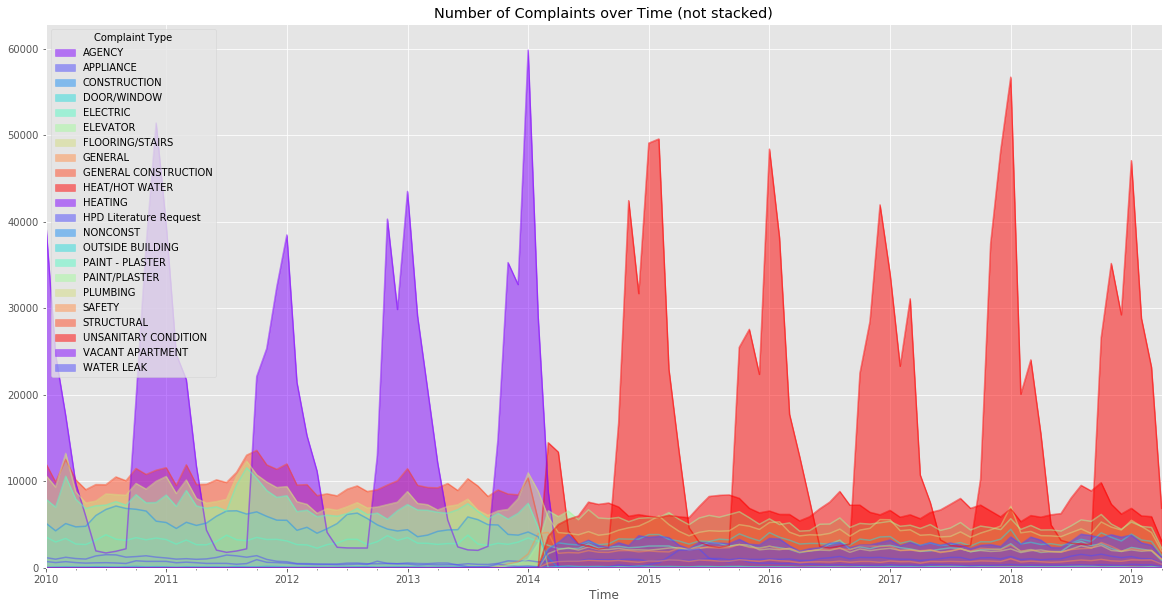

In [235]:
# visualize complaint types over time

viridis = cm.get_cmap('rainbow', 22)
newcolors = viridis(np.linspace(0, 1, 10))

ax = df_311_complaints_month.plot(kind='area', figsize=(20,10), stacked=False, color=newcolors)
ax.set_xlabel('Time')
ax.set_title('Number of Complaints over Time (not stacked)')

plt.show()

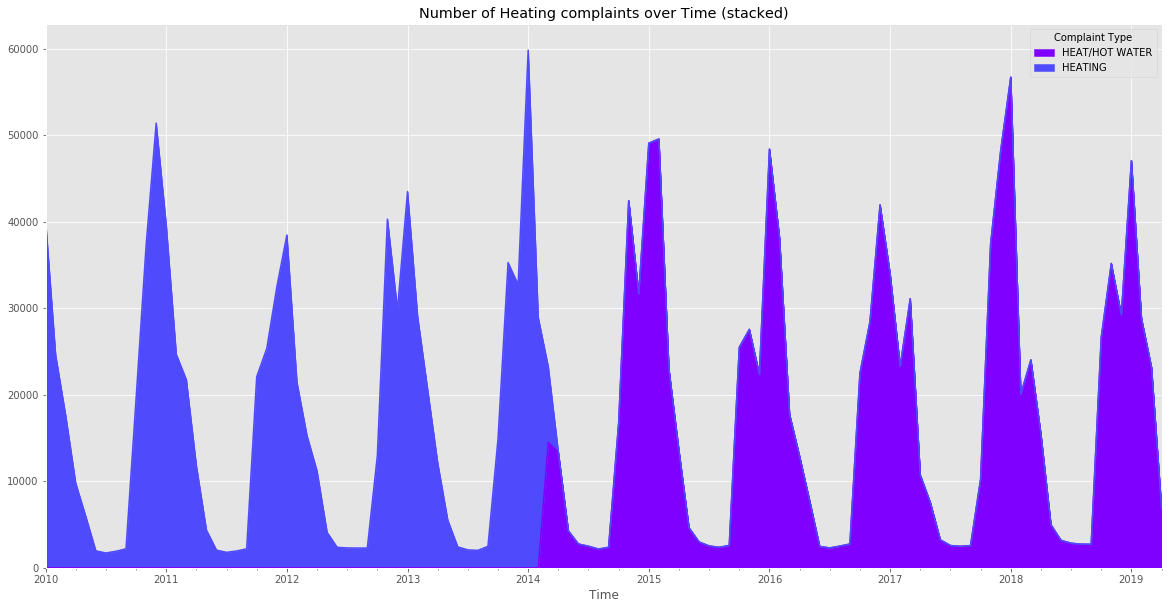

In [236]:
# 'HEATING' might have been replaced 'HEAT/HOT WATER' in 2015, so compare just these two

ax = df_311_complaints_month[['HEAT/HOT WATER', 'HEATING']].plot(kind='area', figsize=(20,10), stacked=True, color=newcolors)
ax.set_xlabel('Time')
ax.set_title('Number of Heating complaints over Time (stacked)')

plt.show()

## 4. step

Complaints related to heating are high in winter times. Compare complaints about heating with the other complaints.

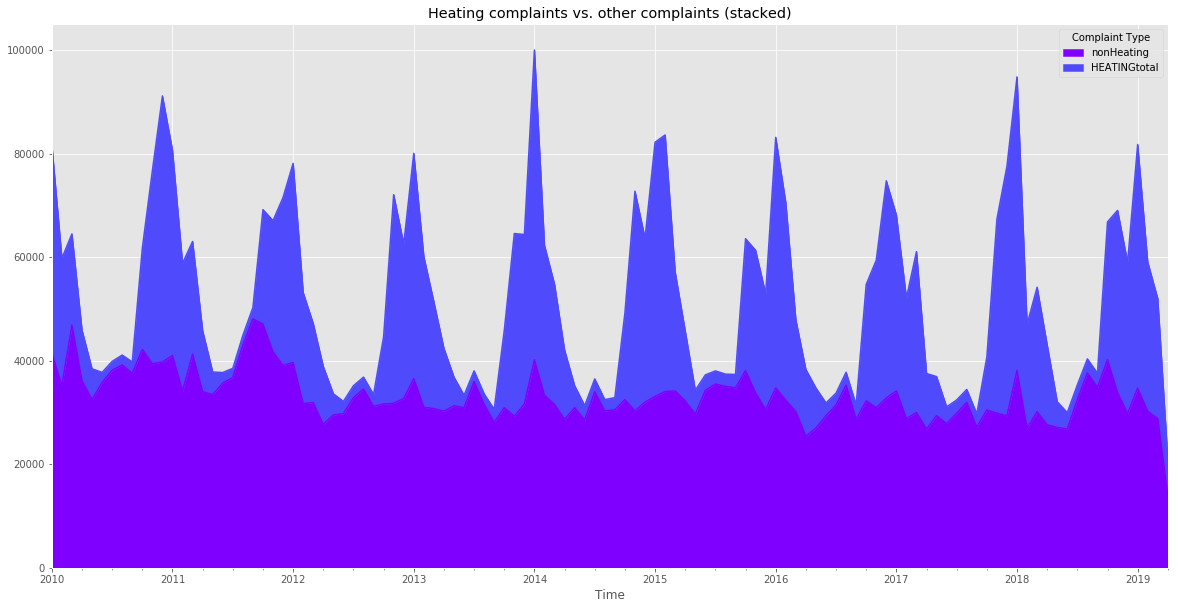

In [237]:
# compare 'HEATING' with all other complaints

df_311_complaints_month2 = df_311_complaints_month

df_311_complaints_month2['HEATINGtotal'] = df_311_complaints_month['HEATING'] + df_311_complaints_month['HEAT/HOT WATER']
#df_311_complaints_month2.drop(['HEATING', 'HEAT/HOT WATER'], axis=1, inplace=True)

collist = ['AGENCY', 'APPLIANCE', 'CONSTRUCTION', 'DOOR/WINDOW', 'ELECTRIC',
       'ELEVATOR', 'FLOORING/STAIRS', 'GENERAL', 'GENERAL CONSTRUCTION',
       'HPD Literature Request', 'NONCONST',
       'OUTSIDE BUILDING', 'PAINT - PLASTER', 'PAINT/PLASTER', 'PLUMBING',
       'SAFETY', 'STRUCTURAL', 'UNSANITARY CONDITION', 'VACANT APARTMENT',
       'WATER LEAK']
df_311_complaints_month2['nonHeating'] = df_311_complaints_month2.loc[:,collist].sum(axis=1)

ax = df_311_complaints_month2[['nonHeating', 'HEATINGtotal']].plot(kind='area', figsize=(20,10), stacked=True, color=newcolors)
ax.set_xlabel('Time')
ax.set_title('Heating complaints vs. other complaints (stacked)')

plt.show()

## Result

In Winter, the number of complaints is twice as high as in summer. This is due to the complaints about Heating. So the recommendation is to look at those first.